In [ ]:
# pip install reminders
!pip install newsapi-python
!pip install spacy
!python -m spacy download en_core_web_sm

In [1]:
# Initial imports
import os
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
%matplotlib inline
from newsapi import NewsApiClient
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
import en_core_web_sm
from spacy import displacy
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\flash\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\flash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\flash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# for env API keys
from dotenv import load_dotenv
load_dotenv()
api_key = os.getenv("news_api")

In [19]:
newsapi = NewsApiClient(api_key=os.environ["news_api"])

In [30]:
# dow jones news
dow_headlines = newsapi.get_everything(
    q='dow jones',
    language='en',
    sort_by='relevancy'
)

In [31]:
# get sentiments from articles
sentiments = []

for articles in dow_headlines['articles']:
    try:
        text = articles['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg'] 

        #put data into sentiments
        sentiments.append({
            'text':text,
            'Compound':compound,
            'Positive':pos,
            'Negative':neg,
            'Neutral':neu})

    except AttributeError:
        pass

dow = pd.DataFrame(sentiments)
dow.head()

,text,Compound,Positive,Negative,Neutral
0,By Reuters Staff\r\nFILE PHOTO: Logos of China...,0.0000,0.000,0.0,1.000
1,(Adds background on steps from S&amp;P DJI and...,0.0000,0.000,0.0,1.000
2,(Reuters) - S&amp;P Dow Jones Indices said on ...,0.0000,0.000,0.0,1.000
3,By Reuters Staff\r\n(Reuters) - S&amp;P Dow Jo...,0.0000,0.000,0.0,1.000
4,By Reuters Staff\r\nFILE PHOTO: 5G active ante...,0.4019,0.076,0.0,0.924


In [32]:
#summary stats
dow.describe()

,Compound,Positive,Negative,Neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.191350,0.054444,0.017444,0.928167
std,0.347697,0.056970,0.029348,0.056189
min,-0.296000,0.000000,0.000000,0.836000
25%,0.000000,0.000000,0.000000,0.883750
50%,0.112350,0.054500,0.000000,0.929500
75%,0.495500,0.094000,0.036750,0.987750
max,0.743000,0.164000,0.077000,1.000000


In [33]:
#tokenization
wnl = WordNetLemmatizer()

stop = stopwords.words('english')

stop.append('``')
stop.append('\'')
stop.append('...')
stop = set(stop)

def tokenizer(text):
    words = word_tokenize(text)
    words = list(filter(lambda w: w.lower(), words))
    words = list(filter(lambda t: t not in punctuation, words))
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens

In [34]:
dow['tokens'] = dow.text.apply(tokenizer)
dow.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,By Reuters Staff\r\nFILE PHOTO: Logos of China...,0.0000,0.000,0.0,1.000,"[Reuters, Staff, FILE, PHOTO, Logos, China, Na..."
1,(Adds background on steps from S&amp;P DJI and...,0.0000,0.000,0.0,1.000,"[Adds, background, step, amp, P, DJI, NYSE, Ja..."
2,(Reuters) - S&amp;P Dow Jones Indices said on ...,0.0000,0.000,0.0,1.000,"[Reuters, amp, P, Dow, Jones, Indices, said, W..."
3,By Reuters Staff\r\n(Reuters) - S&amp;P Dow Jo...,0.0000,0.000,0.0,1.000,"[Reuters, Staff, Reuters, amp, P, Dow, Jones, ..."
4,By Reuters Staff\r\nFILE PHOTO: 5G active ante...,0.4019,0.076,0.0,0.924,"[Reuters, Staff, FILE, PHOTO, 5G, active, ante..."


In [35]:
#n-grams
N = 2
grams = ngrams(tokenizer(dow.text.str.cat()), N)
Counter(grams).most_common(10)

[(('amp', 'P'), 9),
 (('char', 'Reuters'), 9),
 (('Dow', 'Jones'), 6),
 (('stock', 'market'), 6),
 (('P', 'Dow'), 5),
 (('Jones', 'Indices'), 5),
 (('Indices', 'said'), 5),
 (('China', 'Mobile'), 5),
 (('Ltd', 'China'), 5),
 (('Reuters', 'live'), 5),
 (('live', 'blog'), 5),
 (('blog', 'U.S.'), 5),
 (('U.S.', 'UK'), 5),
 (('UK', 'European'), 5),
 (('European', 'stock'), 5),
 (('market', 'click'), 5),
 (('click', 'LIVE/'), 5),
 (('LIVE/', 'type'), 5),
 (('type', 'LIVE/'), 5),
 (('LIVE/', 'news'), 5)]

In [38]:
# top 10 words as tokens
def token_count(token, N=3):
    return Counter(token).most_common(N)

In [39]:
all_tokens = tokenizer(dow.text.str.cat())
token_count(all_tokens, 10)

[('char', 18),
 ('Reuters', 14),
 ('China', 13),
 ('stock', 10),
 ('LIVE/', 10),
 ('amp', 9),
 ('P', 9),
 ('Dow', 8),
 ('U.S.', 8),
 ('news', 6)]

In [40]:
#Word Clouds
def wordcloud(text, title=''):
    df_cloud = WordCloud(width=500).generate(text)
    plt.imshow(df_cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

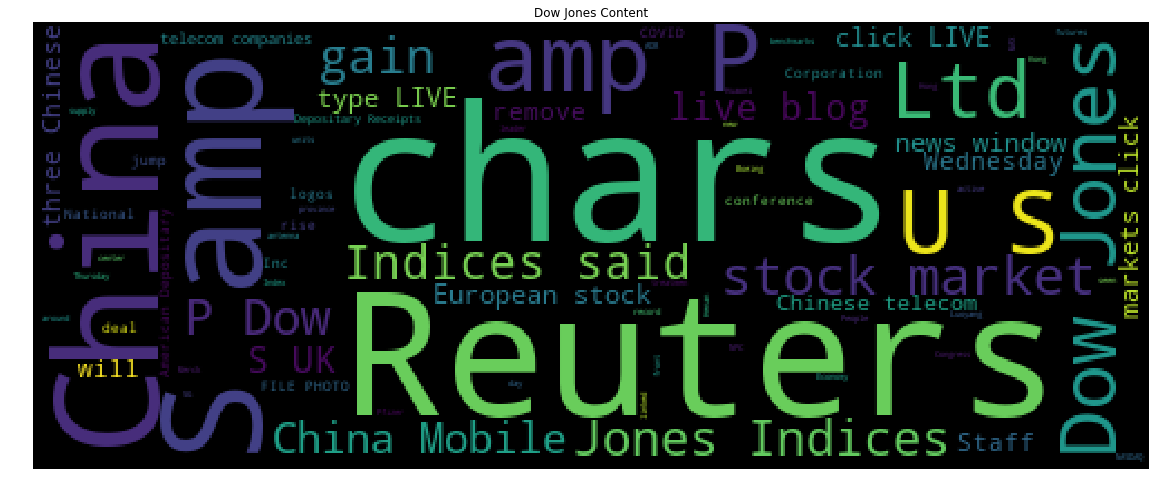

In [41]:
wordcloud(dow.text.str.cat(), title='Dow Jones Content')

In [42]:
# Named Entity Recognition
nlp = en_core_web_sm.load()

In [43]:
# concatinate strings
all_dow_text = dow.text.str.cat()
all_dow_text

"By Reuters Staff\r\nFILE PHOTO: Logos of China National Offshore Oil Corporation (CNOOC) are displayed at a news conference on the company's interim results in Hong Kong, China, March 23, 2017. REUTERS… [+343 chars](Adds background on steps from S&amp;P DJI and NYSE)\r\nJan 6 (Reuters) - S&amp;P Dow Jones Indices said on Wednesday it will remove the American Depositary Receipts of three Chinese telecom companies,… [+1634 chars](Reuters) - S&amp;P Dow Jones Indices said on Wednesday it will remove the American Depositary Receipts of three Chinese telecom companies, China Mobile Ltd, China Telecom Corporation Ltd and China U… [+1484 chars]By Reuters Staff\r\n(Reuters) - S&amp;P Dow Jones Indices said late on Wednesday it will remove the American Depositary Receipts (ADR) of three Chinese telecom companies, China Mobile Ltd,, China Telec… [+344 chars]By Reuters Staff\r\nFILE PHOTO: 5G active antenna units with logos of China Mobile and Huawei are seen in front of a National People's Cong

In [47]:
doc = nlp(all_dow_text)
doc.user_data['title'] = 'Dow Name Entity Recognition'

displacy.render(doc, style='ent', jupyter=True)

In [48]:
# list out all entites
for ent in doc.ents:
    print(ent.text, ent.label_)

Reuters ORG
China National Offshore Oil Corporation ORG
Hong Kong GPE
China GPE
March 23, 2017 DATE
DJI ORG
NYSE ORG
Jan 6 DATE
Reuters ORG
Dow Jones Indices ORG
Wednesday DATE
American NORP
three CARDINAL
Chinese NORP
Dow Jones Indices ORG
Wednesday DATE
American NORP
three CARDINAL
Chinese NORP
China Mobile Ltd ORG
China Telecom Corporation Ltd ORG
China GPE
Reuters ORG
Reuters ORG
Dow Jones Indices ORG
Wednesday DATE
American NORP
ADR ORG
three CARDINAL
Chinese NORP
China Mobile Ltd ORG
China Telec ORG
Reuters ORG
5 CARDINAL
China GPE
Huawei ORG
National People's Congress ORG
NPC ORG
Luoyang GPE
Henan province GPE
China GPE
Reuters ORG
MSCI Inc ORG
FTSE Russell ORG
Dow Jones Indices ORG
three CARDINAL
Chinese NORP
U.S. GPE
5 CARDINAL
China GPE
Huawei ORG
National People's Congress ORG
NPC ORG
Luoyang GPE
Henan province GPE
China GPE
February 27, 2019 DATE
Reuters ORG
Reuters ORG
Dow Jones Indices ORG
Wednesday DATE
ADR ORG
China Mobile Ltd ORG
China Telecom Corporation Ltd ORG
China